<a href="https://colab.research.google.com/github/LeonimerMelo/python/blob/main/Simple_Linear_Regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What Is Regression?

Regression searches for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on their features, such as experience, education level, role, city of employment, and so on.

##Linear Regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

##Simple Linear Regression

Simple or single-variate linear regression is the simplest case of linear regression, as it has a single independent variable, 𝐱 = 𝑥.

The following figure illustrates simple linear regression:

 <img src="https://files.realpython.com/media/fig-lin-reg.a506035b654a.png" alt="Linear Regression" width="800" height="400">

 Example of simple linear regression

The estimated regression function, represented by the black line, has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥. Your goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function.

The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis. It’s the value of the estimated response 𝑓(𝑥) for 𝑥 = 0. The value of 𝑏₁ determines the slope of the estimated regression line.

The vertical dashed grey lines represent the residuals, which can be calculated as 𝑦ᵢ - 𝑓(𝐱ᵢ) = 𝑦ᵢ - 𝑏₀ - 𝑏₁𝑥ᵢ for 𝑖 = 1, …, 𝑛. They’re the distances between the green circles and red squares. When you implement linear regression, you’re actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible.

 <img src="https://miro.medium.com/v2/resize:fit:720/1*CjTBNFUEI_IokEOXJ00zKw.gif" alt="Linear Regression">

 Example how algoritm fits best result

In [ ]:
# Imoprting required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Reading the csv file.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/dataLinearRegression.csv')
# Displayinng the first-last elements of the dataframe.
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
# Taking the Hours and Scores column of the dataframe as X and y
# respectively and coverting them to numpy arrays.
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])

Now, you have two arrays: the input, X, and the output, y. You should call .reshape() on x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [ ]:
# first 5 elements of X
X[0:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

As you can see, x has two dimensions, and x.shape is (25, 1), while y has a single dimension, and y.shape is (25,).

In [ ]:
print(X.shape)
print(y.shape)

(25, 1)
(25,)


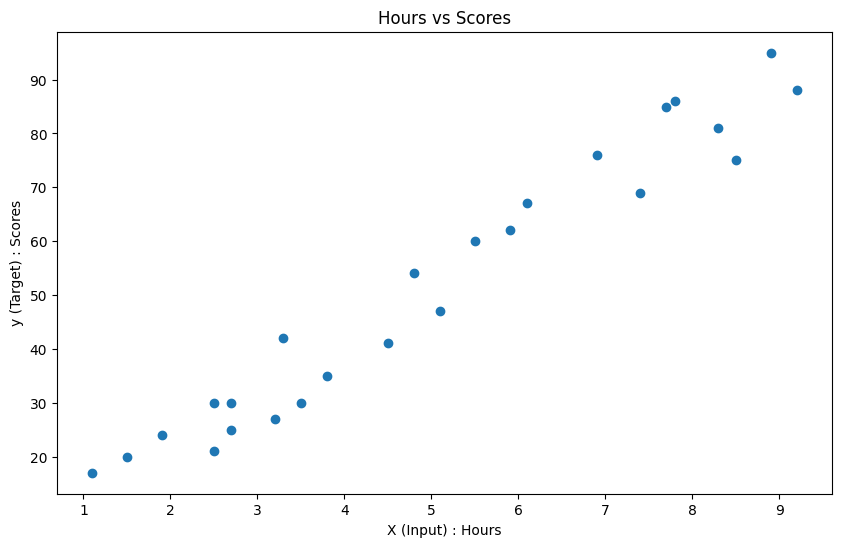

In [ ]:
# Plotting the data X(Hours) on x-axis and y(Scores) on y-axis
plt.figure(figsize=(10,6)) # figure size
plt.scatter(X, y)
plt.title('Hours vs Scores')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')
plt.show()

Mathematically, we can represent a linear regression as:
$y=a_0+a_1x+ε$

$y$ = Dependent Variable (Target Variable)

$x$ = Independent Variable (predictor Variable)

$a_0$ = intercept of the line (Gives an additional degree of freedom)

$a_1$ = Linear regression coefficient (scale factor to each input value)

$ε$ = random error

The values for x and y variables are training datasets for Linear Regression model representation.

##Create a model and fit it

The next step is to create a linear regression model and fit it using the existing data.

Create an instance of the class `LinearRegression`, which will represent the regression model:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

This statement creates the variable model as an instance of LinearRegression. You can provide several optional parameters to LinearRegression:

* **fit_intercept** is a Boolean that, if True, decides to calculate the intercept 𝑏₀ or, if False, considers it equal to zero. It defaults to True.
* **normalize** is a Boolean that, if True, decides to normalize the input variables. It defaults to False, in which case it doesn’t normalize the input variables.
* **copy_X** is a Boolean that decides whether to copy (True) or overwrite the input variables (False). It’s True by default.
* **n_jobs** is either an integer or None. It represents the number of jobs used in parallel computation. It defaults to None, which usually means one job. -1 means to use all available processors.

Your model as defined above uses the default values of all parameters.

It’s time to start using the model. First, you need to call `.fit()` on model:

In [ ]:
X[:20]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4]])

In [ ]:
X[20:]

array([[2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
# spliting manualy train and test data set
X_train, X_test, y_train, y_test = X[:20], X[20:], y[:20], y[20:]
model.fit(X_train,y_train);

With `.fit()`, you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output, X and y, as the arguments. In other words, `.fit()` fits the model.

##Get results

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and to interpret it.

You can obtain the coefficient of determination (𝑅² score), with .score() called on model.

𝑅² score = 1 is perfect prediction.

In [ ]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination (train dataset): {r_sq}")

coefficient of determination (train dataset): 0.9554562450839484


In [ ]:
r_sq = model.score(X_test, y_test)
print(f"coefficient of determination (test dataset): {r_sq}")

coefficient of determination (test dataset): 0.9273291976521455


The attributes of model are `.intercept_`, which represents the coefficient a₀, and `.coef_`, which represents a₁:

In [ ]:
print('Intercept of the Y axis [a0]:', model.intercept_)
print('Linear regression coefficient [a1]: ', model.coef_)

Intercept of the Y axis [a0]: 3.0312830386057854
Linear regression coefficient [a1]:  [9.52038609]


In [ ]:
# using math line model
a0=model.intercept_
a1=model.coef_
y_my_predict = a0 + a1*X_test

Using the expression $y=a_0+a_1x+ε$ for linear regression prediction, making $ε=0$.

In [ ]:
y_my_predict

array([[28.73632549],
       [48.72913629],
       [39.2087502 ],
       [68.72194709],
       [77.29029458]])

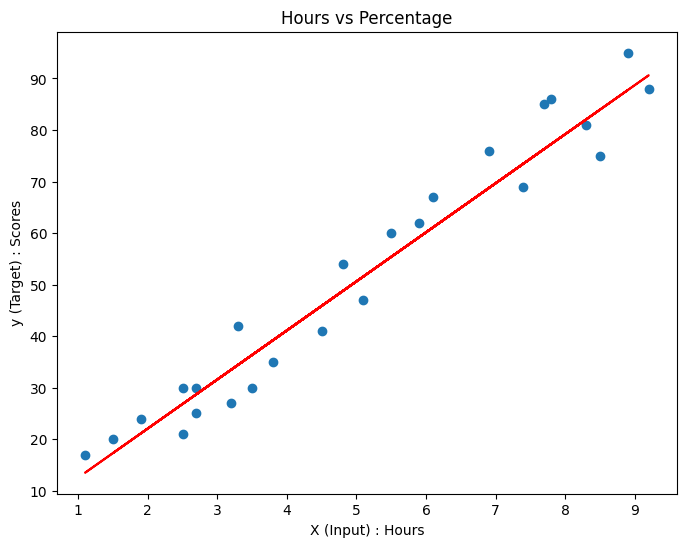

In [ ]:
# Plotting our predictions.
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, model.predict(X),'r-')  # X and predictions.
plt.title('Hours vs Percentage')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')
plt.show()

In [ ]:
# Predicting on the test set.
y_preds = model.predict(X_test)
print('y predicts: ', y_preds.reshape(-1))

y predicts:  [28.73632549 48.72913629 39.2087502  68.72194709 77.29029458]


In [ ]:
# Comparing True values to our predictions.
yy=y_test.reshape(-1)
xx=y_preds.reshape(-1)
Compare_df = pd.DataFrame({'Actual':yy,'Predicted':xx})
Compare_df

,Actual,Predicted
0,30,28.736325
1,54,48.729136
2,35,39.208750
3,76,68.721947
4,86,77.290295


##Evaluating the Model

After looking at the data, seeing a linear relationship, training and testing our model, we can understand how well it predicts by using some metrics. For regression models, three evaluation metrics are mainly used:

**Mean Absolute Error (MAE)**: When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.

$$mae=(\frac{1}{n})\sum_{i=1}^n\left | Actual - Predicted \right |$$


**Mean Squared Error (MSE)**: It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.

$$mse=\sum_{i=1}^n\left ( Actual - Predicted \right )^2$$

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 35.18


### R2 score
The **R2 score** is a very important metric that is used to evaluate the performance of a **regression-based machine learning model**. It is pronounced as R squared and is also known as the **coefficient of determination**. It works by measuring the amount of variance in the predictions explained by the dataset. R2 score = 1 is perfect prediction.

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.93


#Exercícios

1. Utilize o banco de dados Simple_linear_regression.csv para treitar um modelo de Regressão Linear.
2. Visualze o banco de dados em forma de tabela e gráfico.
3. Crie um banco de treinamento (70%) e testes (30%).
4. Faça as predições e plote os resultados.
5. Utilize as métricas para avaliar os resultados.
6. Explique o princípio de funcionamento do algoritmo de Regressão Linear.

##Referências

[1] https://realpython.com/linear-regression-in-python/

[2] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[3] https://www.w3schools.com/python/python_ml_linear_regression.asp

[4] https://www.geeksforgeeks.org/linear-regression-python-implementation/

[5] https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

[6] https://blog.gopenai.com/linear-regression-made-simple-everything-you-need-to-know-to-get-started-77cc44c98c9

###Colaboração dos alunos

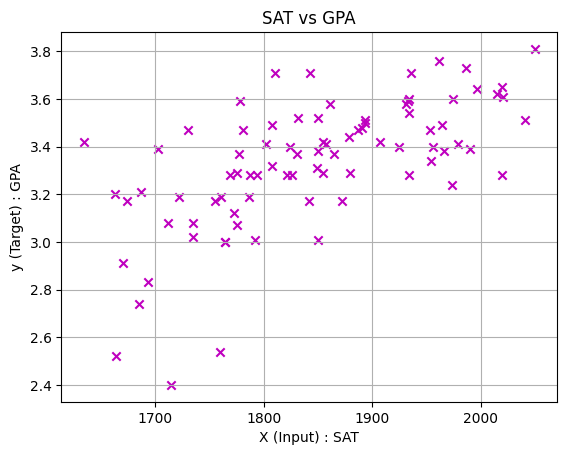

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


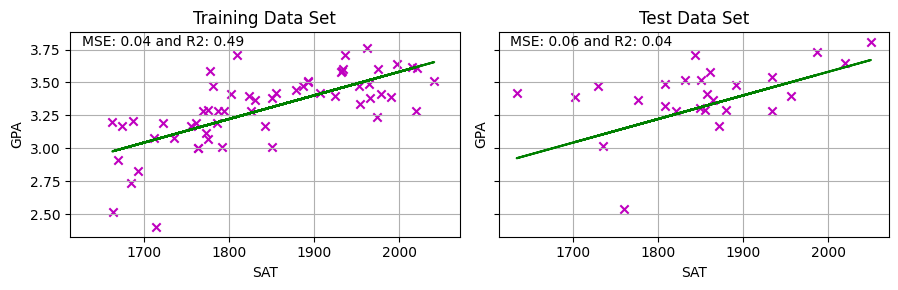

In [ ]:
# Colaboração de João Paulo Monteiro Santana <joao.paulo.santana@uel.br>

# Importando bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Organização dos dados:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Simple_linear_regression.csv')

x_data = np.array(df['SAT']).reshape(-1,1)
y_data = np.array(df['GPA'])

# Visualizando os dados em plot:

plt.figure()
plt.scatter(x_data, y_data, color='m', marker='x')
plt.title('SAT vs GPA')
plt.xlabel('X (Input) : SAT')
plt.ylabel('y (Target) : GPA')
plt.grid()
plt.show()

# Visualizando os dados em forma de tabela:

print(df)

# Separando os dados em treinamento e teste:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train,y_train);

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Resultados e Métricas:

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(9,3), tight_layout=True ,sharey=True, sharex=True)

axs[0].scatter(x_train, y_train, color='m', marker='x')
axs[0].plot(x_train, y_pred_train, color='g')
axs[0].set_title('Training Data Set')
axs[0].set_xlabel('SAT')
axs[0].set_ylabel('GPA')
axs[0].grid()

axs[1].scatter(x_test, y_test, color='m', marker='x')
axs[1].plot(x_test, y_pred_test, color='g')
axs[1].set_title('Test Data Set')
axs[1].set_xlabel('SAT')
axs[1].set_ylabel('GPA')
axs[1].grid()

# Métricas MSE e R2:

fig.text(0.0875, 0.83, f'MSE: {mse_train:.2f} and R2: {r2_train:.2f}')
fig.text(0.5625, 0.83, f'MSE: {mse_test:.2f} and R2: {r2_test:.2f}')

plt.show()